In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
# Import data
train = pd.read_csv('Train.csv')


In [3]:
# print shape 
print('train data shape :', train.shape)

train data shape : (39650, 3)


In [4]:
# Inspect Data by shing the first five rows 
train.head(10)

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence
5,ID_0052TYKI,"Yes men rape women. But women also rape men, y...",sexual_violence
6,ID_0058QG76,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
7,ID_005VM1DJ,Pretty sure he raped a 16yr old girl with 2 fr...,sexual_violence
8,ID_0060BW8R,TW sorry to hear that and yeah he recently th...,sexual_violence
9,ID_007FAIEI,"""I understand that... My father was abusive as...",sexual_violence


In [5]:
train['type'].value_counts(ascending=True) 

Harmful_Traditional_practice      188
economic_violence                 217
emotional_violence                651
Physical_violence                5946
sexual_violence                 32648
Name: type, dtype: int64

In [6]:
# Importing modules used to remove stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Martin
[nltk_data]     Msuya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#remove id feature 

train = train.drop('Tweet_ID', axis=1)


In [8]:
# loading important libraries
from nltk.corpus import stopwords # importing stopwords
from nltk.stem import PorterStemmer
import re # used for text persing

stemmer = PorterStemmer()
words = stopwords.words("english")

train['processedtext'] = train['tweet'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [9]:
train.head(7)

,tweet,type,processedtext
0,Had a dream i got raped last night. By a guy i...,sexual_violence,had dream got rape last night by guy work actu...
1,he thought the word raped means sex and told m...,sexual_violence,thought word rape mean sex told saw dog rape e...
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,she not talk to me i wa rape by men molest he ...
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence,i sexual abus year age no one believ i rape br...
4,Chessy Prout can do better by telling the trut...,sexual_violence,chessi prout better tell truth by sell owen la...
5,"Yes men rape women. But women also rape men, y...",sexual_violence,ye men rape women but women also rape men yet ...
6,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence,my husband beat me frequent wife tell court


### Convert Into Lower case 

In [10]:
# Convert into lower case
train['processedtext']= train['processedtext'].str.lower()


### Removing Punctuation from Tweets

In [11]:
# Removing Punctuation from the Tweets
import string

train['processedtext']= train['processedtext'].str.strip(string.punctuation)


### Removing Intergers from the tweets

In [12]:
# Removing Intergers from the tweets
train['processedtext'] = [x for x in train['processedtext'] if not isinstance(x, int)]


### Removing Emojis from the tweets

In [13]:
# Removing Emojis from the tweets
train['processedtext'] = [item.encode('ascii', 'ignore').decode('ascii') for item in train['processedtext'] ]


### Lable Encoding our target variable 

In [14]:
#import LableEncoder module 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['type'] = le.fit_transform(train['type'])

train.head(50).append(train.tail(50))

,tweet,type,processedtext
0,Had a dream i got raped last night. By a guy i...,4,had dream got rape last night by guy work actu...
1,he thought the word raped means sex and told m...,4,thought word rape mean sex told saw dog rape e...
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,4,she not talk to me i wa rape by men molest he ...
3,I was sexually abused for 3 years at age 4 to ...,4,i sexual abus year age no one believ i rape br...
4,Chessy Prout can do better by telling the trut...,4,chessi prout better tell truth by sell owen la...
...,...,...,...
39645,"ENTRY 1299: 21F. 23M, BF’s cousin. Got drunk o...",4,entri f m bf cousin got drunk halloween i like...
39646,So you’re telling me Emmanuel Macron was groom...,4,so tell emmanuel macron groom mayb even rape c...
39647,"My wife regularly beats me, I get dirty slaps ...",1,my wife regularli beat i get dirti slap husban...
39648,Me: Hey babe! Police officer boyfriend: is tha...,4,me hey babe polic offic boyfriend me ye babe g...


### Text Vectorization using TF-IDF Vectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

vector=vectorizer_tfidf.fit_transform(train['processedtext'].values.astype('U'))

#print(vectorizer_tfidf.get_feature_names()[:10])
print("n_samples: %d, n_features: %d" % vector.shape)


n_samples: 39650, n_features: 25954


In [16]:
# Select the first five documents from the data set
tf_idf = pd.DataFrame(vector.todense()).iloc[:5]  
tf_idf.columns = vectorizer_tfidf.get_feature_names()
tfidf_matrix = tf_idf.T
tfidf_matrix.columns = ['tweet'+ str(i) for i in range(1, 6)]
tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 10 words 
tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:10] 

# Print the first 10 words 
print(tfidf_matrix.drop(columns=['count']).head(10))

             tweet1    tweet2    tweet3    tweet4    tweet5
smoke      0.635930  0.000000  0.000000  0.000000  0.000000
word       0.000000  0.294805  0.301498  0.000000  0.000000
nother     0.000000  0.000000  0.593019  0.000000  0.000000
eachoth    0.000000  0.552542  0.000000  0.000000  0.000000
bro        0.000000  0.000000  0.000000  0.473031  0.000000
chessi     0.000000  0.000000  0.000000  0.000000  0.463254
classroom  0.000000  0.000000  0.000000  0.373405  0.000000
dog        0.000000  0.362656  0.000000  0.000000  0.000000
wtf        0.000000  0.348267  0.000000  0.000000  0.000000
sexual     0.187536  0.000000  0.000000  0.159266  0.000000


In [17]:
# Splitting the dataset to training and testing sets
from sklearn.model_selection import train_test_split


target = train['type']


X_train, X_test, y_train, y_test = train_test_split(vector, target, test_size=0.30, random_state=100, stratify = target)

print(train.shape); print(X_train.shape); print(X_test.shape)

(39650, 3)
(27755, 25954)
(11895, 25954)


In [18]:
# how to save the model into the folder 
import joblib

joblib.dump(vectorizer_tfidf, 'GBV/Preprocessing/vectorizer_tfidf.pkl')

['GBV/Preprocessing/vectorizer_tfidf.pkl']

### Data Imbalancing

In [19]:
# !pip install -U imbalanced-learn

In [20]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
from sklearn.model_selection import train_test_split

target = train['type']
ros = RandomUnderSampler()
x_ros, y_ros = ros.fit_resample(vector, target)

x_train_ros, x_test, y_train_ros, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=100, stratify = y_ros)

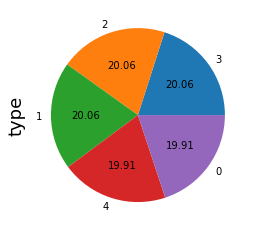

In [28]:
ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')


In [30]:
print(y_ros.value_counts())

0    188
1    188
2    188
3    188
4    188
Name: type, dtype: int64


# RandomForestClassifier

In [31]:
# # Fitting Random Forest Classification to the dataset
# import the classifier
from sklearn.ensemble import RandomForestClassifier

# # create classifier object
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)

# # fit the classifier with x and y data
classifier.fit(x_train_ros, y_train_ros)

pred = classifier.predict(x_test)


In [32]:
# # Calculating the f1 score
from sklearn import metrics
f1_score = metrics.f1_score(y_test,pred,average='macro')
print(f1_score)

0.9713260344887893


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.96      0.98      0.97        56
           2       0.96      0.98      0.97        56
           3       0.98      1.00      0.99        56
           4       0.96      0.89      0.93        57

    accuracy                           0.97       282
   macro avg       0.97      0.97      0.97       282
weighted avg       0.97      0.97      0.97       282



In [34]:
# # how to save the model into the folder 
import joblib

joblib.dump(classifier, 'GBV/Model/RandomForestClassifier.pkl')

['GBV/Model/RandomForestClassifier.pkl']

# OTHER ALGORITHMS

In [35]:
# !pip install xgboost

## 1. XgBoost after Over balancing

In [36]:
# evaluate xgboost algorithm for classification
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics

# split the data test
from sklearn.model_selection import train_test_split
# target = train['type']

# x_train,x_test,y_train,y_test=train_test_split(vector, target, test_size=0.30, random_state=100, stratify = target)


# define the model
xg_Classifier = XGBClassifier()

#fit the model
xg_Classifier.fit(x_train_ros, y_train_ros)

# evaluate the model
xg_pred = xg_Classifier.predict(x_test)

# Calculating the f1 score
f1_score=metrics.f1_score(y_test,xg_pred,average='macro')
f1_score

0.9610571963273407

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.96      0.98      0.97        56
           2       0.96      0.95      0.95        56
           3       0.98      0.98      0.98        56
           4       0.91      0.91      0.91        57

    accuracy                           0.96       282
   macro avg       0.96      0.96      0.96       282
weighted avg       0.96      0.96      0.96       282



<Figure size 2160x2160 with 0 Axes>

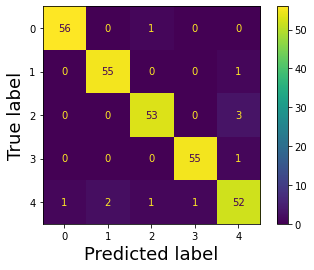

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(30,30))
#Compute confusion matrix to evaluate the accuray of a classification
confusion_table = confusion_matrix(y_test,xg_pred)

#Confusion matrix visualization
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_table, display_labels=[0,1,2,3,4])

#create the plot
cm_display.plot()

#display the plot
plt.show()


 ### 0 - 'Harmful_Traditional_practice', 1 - 'Physical_violence', 2 - 'economic_violence', 3 - 'emotional_violence',  4 - 'sexual_violence'   

In [39]:
# how to save the model into the folder 
import joblib

joblib.dump(xg_Classifier, 'GBV/Model/XGBClassifier_model.pkl')

['GBV/Model/XGBClassifier_model.pkl']

## 2. Lightgbm after balancing

In [40]:
# installing lightgbm

# !pip install lightgbm

In [42]:
# evaluate lightgbm algorithm for classification
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn import metrics

# split the data test
from sklearn.model_selection import train_test_split
# target = train['type']

# x_train,x_test,y_train,y_test=train_test_split(vector, target, test_size=0.30, random_state=100, stratify = target)


# define the model
l_Classifier = LGBMClassifier()

#fit the model
l_Classifier.fit(x_train_ros, y_train_ros)

# evaluate the model
l_pred = l_Classifier.predict(x_test)

# Calculating the f1 score
f1_score=metrics.f1_score(y_test,l_pred,average='macro')
f1_score

0.9644093488715914

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,l_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.95      0.98      0.96        56
           2       0.98      0.96      0.97        56
           3       0.98      0.98      0.98        56
           4       0.93      0.89      0.91        57

    accuracy                           0.96       282
   macro avg       0.96      0.96      0.96       282
weighted avg       0.96      0.96      0.96       282



<Figure size 2160x2160 with 0 Axes>

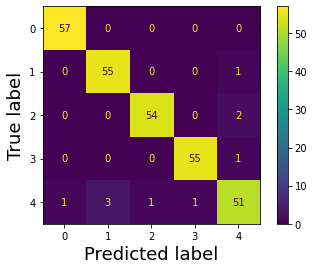

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(30,30))
#Compute confusion matrix to evaluate the accuray of a classification
confusion_table = confusion_matrix(y_test,l_pred)

#Confusion matrix visualization
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_table, display_labels=[0,1,2,3,4])

#create the plot
cm_display.plot()

#display the plot
plt.show()


 ### 0 - 'Harmful_Traditional_practice', 1 - 'Physical_violence', 2 - 'economic_violence', 3 - 'emotional_violence',  4 - 'sexual_violence'   

In [45]:
# how to save the model into the folder 
import joblib

joblib.dump(l_Classifier, 'GBV/Model/LGBMClassifier.pkl')

['GBV/Model/LGBMClassifier.pkl']

## 3. CatBoost after Balancing

In [ ]:
# installing catboost
# !pip install catBoost

In [46]:
# evaluate xgboost algorithm for classification
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn import metrics

# split the data test
from sklearn.model_selection import train_test_split
# target = train['type']

# x_train,x_test,y_train,y_test=train_test_split(vector, target, test_size=0.30, random_state=100, stratify = target)


# define the model
cat_Classifier = CatBoostClassifier()

#fit the model
cat_Classifier.fit(x_train_ros, y_train_ros)

# evaluate the model
cat_pred = cat_Classifier.predict(x_test)

# Calculating the f1 score
f1_score=metrics.f1_score(y_test,cat_pred,average='macro')
f1_score

Learning rate set to 0.077456
0:	learn: 1.4461770	total: 223ms	remaining: 3m 42s
1:	learn: 1.3261739	total: 282ms	remaining: 2m 20s
2:	learn: 1.1885921	total: 354ms	remaining: 1m 57s
3:	learn: 1.0875943	total: 428ms	remaining: 1m 46s
4:	learn: 1.0186874	total: 499ms	remaining: 1m 39s
5:	learn: 0.9442930	total: 569ms	remaining: 1m 34s
6:	learn: 0.8830906	total: 639ms	remaining: 1m 30s
7:	learn: 0.8159289	total: 709ms	remaining: 1m 27s
8:	learn: 0.7670354	total: 779ms	remaining: 1m 25s
9:	learn: 0.7272744	total: 852ms	remaining: 1m 24s
10:	learn: 0.6802523	total: 922ms	remaining: 1m 22s
11:	learn: 0.6407439	total: 999ms	remaining: 1m 22s
12:	learn: 0.5964199	total: 1.07s	remaining: 1m 21s
13:	learn: 0.5558017	total: 1.14s	remaining: 1m 20s
14:	learn: 0.5208410	total: 1.2s	remaining: 1m 18s
15:	learn: 0.4946834	total: 1.27s	remaining: 1m 18s
16:	learn: 0.4642375	total: 1.34s	remaining: 1m 17s
17:	learn: 0.4348596	total: 1.42s	remaining: 1m 17s
18:	learn: 0.4171334	total: 1.49s	remaining: 

161:	learn: 0.0978570	total: 11.6s	remaining: 59.9s
162:	learn: 0.0977686	total: 11.6s	remaining: 59.8s
163:	learn: 0.0976770	total: 11.7s	remaining: 59.7s
164:	learn: 0.0975082	total: 11.8s	remaining: 59.6s
165:	learn: 0.0957978	total: 11.8s	remaining: 59.5s
166:	learn: 0.0950455	total: 11.9s	remaining: 59.4s
167:	learn: 0.0949261	total: 12s	remaining: 59.3s
168:	learn: 0.0933060	total: 12s	remaining: 59.2s
169:	learn: 0.0932018	total: 12.1s	remaining: 59.1s
170:	learn: 0.0916859	total: 12.2s	remaining: 59s
171:	learn: 0.0913125	total: 12.2s	remaining: 58.9s
172:	learn: 0.0912009	total: 12.3s	remaining: 58.8s
173:	learn: 0.0910465	total: 12.4s	remaining: 58.7s
174:	learn: 0.0909555	total: 12.4s	remaining: 58.6s
175:	learn: 0.0907874	total: 12.5s	remaining: 58.5s
176:	learn: 0.0907060	total: 12.6s	remaining: 58.4s
177:	learn: 0.0905657	total: 12.6s	remaining: 58.3s
178:	learn: 0.0904009	total: 12.7s	remaining: 58.2s
179:	learn: 0.0902735	total: 12.8s	remaining: 58.2s
180:	learn: 0.0901

322:	learn: 0.0529715	total: 23.1s	remaining: 48.5s
323:	learn: 0.0529239	total: 23.2s	remaining: 48.4s
324:	learn: 0.0528633	total: 23.3s	remaining: 48.3s
325:	learn: 0.0528189	total: 23.3s	remaining: 48.3s
326:	learn: 0.0524695	total: 23.4s	remaining: 48.2s
327:	learn: 0.0524354	total: 23.5s	remaining: 48.1s
328:	learn: 0.0523712	total: 23.6s	remaining: 48s
329:	learn: 0.0523289	total: 23.6s	remaining: 48s
330:	learn: 0.0517309	total: 23.7s	remaining: 47.9s
331:	learn: 0.0516894	total: 23.8s	remaining: 47.8s
332:	learn: 0.0511661	total: 23.8s	remaining: 47.7s
333:	learn: 0.0510917	total: 23.9s	remaining: 47.6s
334:	learn: 0.0510412	total: 24s	remaining: 47.5s
335:	learn: 0.0510044	total: 24s	remaining: 47.5s
336:	learn: 0.0509711	total: 24.1s	remaining: 47.4s
337:	learn: 0.0509344	total: 24.2s	remaining: 47.3s
338:	learn: 0.0508938	total: 24.2s	remaining: 47.2s
339:	learn: 0.0508481	total: 24.3s	remaining: 47.1s
340:	learn: 0.0508142	total: 24.4s	remaining: 47.1s
341:	learn: 0.050784

483:	learn: 0.0377756	total: 34.9s	remaining: 37.3s
484:	learn: 0.0377555	total: 35s	remaining: 37.2s
485:	learn: 0.0374255	total: 35.1s	remaining: 37.1s
486:	learn: 0.0374043	total: 35.2s	remaining: 37s
487:	learn: 0.0373874	total: 35.2s	remaining: 37s
488:	learn: 0.0373643	total: 35.3s	remaining: 36.9s
489:	learn: 0.0371914	total: 35.4s	remaining: 36.8s
490:	learn: 0.0371671	total: 35.5s	remaining: 36.8s
491:	learn: 0.0371402	total: 35.5s	remaining: 36.7s
492:	learn: 0.0371147	total: 35.6s	remaining: 36.6s
493:	learn: 0.0370946	total: 35.7s	remaining: 36.6s
494:	learn: 0.0370716	total: 35.8s	remaining: 36.5s
495:	learn: 0.0370511	total: 35.8s	remaining: 36.4s
496:	learn: 0.0368070	total: 35.9s	remaining: 36.4s
497:	learn: 0.0366020	total: 36s	remaining: 36.3s
498:	learn: 0.0365849	total: 36.1s	remaining: 36.2s
499:	learn: 0.0365686	total: 36.2s	remaining: 36.2s
500:	learn: 0.0365408	total: 36.3s	remaining: 36.1s
501:	learn: 0.0365166	total: 36.3s	remaining: 36s
502:	learn: 0.0364996	

644:	learn: 0.0272310	total: 47.2s	remaining: 26s
645:	learn: 0.0272210	total: 47.3s	remaining: 25.9s
646:	learn: 0.0272085	total: 47.4s	remaining: 25.8s
647:	learn: 0.0271997	total: 47.4s	remaining: 25.8s
648:	learn: 0.0269473	total: 47.5s	remaining: 25.7s
649:	learn: 0.0269386	total: 47.6s	remaining: 25.6s
650:	learn: 0.0269249	total: 47.7s	remaining: 25.5s
651:	learn: 0.0269163	total: 47.7s	remaining: 25.5s
652:	learn: 0.0269025	total: 47.8s	remaining: 25.4s
653:	learn: 0.0268872	total: 47.9s	remaining: 25.3s
654:	learn: 0.0268772	total: 47.9s	remaining: 25.2s
655:	learn: 0.0268656	total: 48s	remaining: 25.2s
656:	learn: 0.0268532	total: 48.1s	remaining: 25.1s
657:	learn: 0.0268441	total: 48.1s	remaining: 25s
658:	learn: 0.0268310	total: 48.2s	remaining: 25s
659:	learn: 0.0267787	total: 48.3s	remaining: 24.9s
660:	learn: 0.0267697	total: 48.4s	remaining: 24.8s
661:	learn: 0.0263310	total: 48.5s	remaining: 24.7s
662:	learn: 0.0263213	total: 48.5s	remaining: 24.7s
663:	learn: 0.026310

805:	learn: 0.0209456	total: 59.3s	remaining: 14.3s
806:	learn: 0.0209391	total: 59.3s	remaining: 14.2s
807:	learn: 0.0209258	total: 59.4s	remaining: 14.1s
808:	learn: 0.0209204	total: 59.5s	remaining: 14s
809:	learn: 0.0209137	total: 59.5s	remaining: 14s
810:	learn: 0.0209028	total: 59.6s	remaining: 13.9s
811:	learn: 0.0208928	total: 59.7s	remaining: 13.8s
812:	learn: 0.0208874	total: 59.7s	remaining: 13.7s
813:	learn: 0.0208752	total: 59.8s	remaining: 13.7s
814:	learn: 0.0208687	total: 59.9s	remaining: 13.6s
815:	learn: 0.0208604	total: 60s	remaining: 13.5s
816:	learn: 0.0207369	total: 1m	remaining: 13.4s
817:	learn: 0.0207257	total: 1m	remaining: 13.4s
818:	learn: 0.0207179	total: 1m	remaining: 13.3s
819:	learn: 0.0207066	total: 1m	remaining: 13.2s
820:	learn: 0.0207004	total: 1m	remaining: 13.2s
821:	learn: 0.0206920	total: 1m	remaining: 13.1s
822:	learn: 0.0206647	total: 1m	remaining: 13s
823:	learn: 0.0206592	total: 1m	remaining: 12.9s
824:	learn: 0.0206505	total: 1m	remaining: 1

966:	learn: 0.0172316	total: 1m 11s	remaining: 2.43s
967:	learn: 0.0170926	total: 1m 11s	remaining: 2.36s
968:	learn: 0.0170875	total: 1m 11s	remaining: 2.29s
969:	learn: 0.0170834	total: 1m 11s	remaining: 2.21s
970:	learn: 0.0170763	total: 1m 11s	remaining: 2.14s
971:	learn: 0.0170679	total: 1m 11s	remaining: 2.06s
972:	learn: 0.0169258	total: 1m 11s	remaining: 1.99s
973:	learn: 0.0168613	total: 1m 11s	remaining: 1.92s
974:	learn: 0.0168579	total: 1m 11s	remaining: 1.84s
975:	learn: 0.0168544	total: 1m 12s	remaining: 1.77s
976:	learn: 0.0168505	total: 1m 12s	remaining: 1.7s
977:	learn: 0.0168451	total: 1m 12s	remaining: 1.62s
978:	learn: 0.0167699	total: 1m 12s	remaining: 1.55s
979:	learn: 0.0167506	total: 1m 12s	remaining: 1.48s
980:	learn: 0.0167467	total: 1m 12s	remaining: 1.4s
981:	learn: 0.0167418	total: 1m 12s	remaining: 1.33s
982:	learn: 0.0167386	total: 1m 12s	remaining: 1.25s
983:	learn: 0.0167303	total: 1m 12s	remaining: 1.18s
984:	learn: 0.0165472	total: 1m 12s	remaining: 1

0.9611209769220947

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,cat_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.98      0.98      0.98        56
           2       0.95      0.96      0.96        56
           3       0.98      0.96      0.97        56
           4       0.91      0.91      0.91        57

    accuracy                           0.96       282
   macro avg       0.96      0.96      0.96       282
weighted avg       0.96      0.96      0.96       282



<Figure size 2160x2160 with 0 Axes>

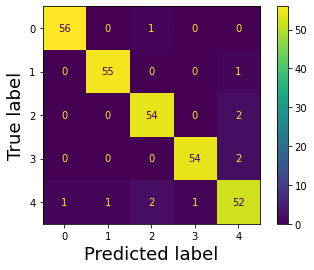

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(30,30))
#Compute confusion matrix to evaluate the accuray of a classification
confusion_table = confusion_matrix(y_test,cat_pred)

#Confusion matrix visualization
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_table, display_labels=[0,1,2,3,4])

#create the plot
cm_display.plot()

#display the plot
plt.show()


 ### 0 - 'Harmful_Traditional_practice', 1 - 'Physical_violence', 2 - 'economic_violence', 3 - 'emotional_violence',  4 - 'sexual_violence'   

In [49]:
# how to save the model into the folder 
import joblib

joblib.dump(cat_Classifier, 'GBV/Model/cat_Classifier_model.pkl')

['GBV/Model/cat_Classifier_model.pkl']

## 4. Soft Voting Classifer after balancing 

In [50]:
# evaluate VotingClassifer algorithm for classification
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn import metrics

# split the data test
from sklearn.model_selection import train_test_split
# target = train['type']

# x_train,x_test,y_train,y_test=train_test_split(vector, target, test_size=0.30, random_state=100, stratify = target)

# creating submodels
estimators = []
model1 = LogisticRegression()
estimators.append(('Logistic',model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart',model2))
model3 = SVC(probability=True)
estimators.append(('svm',model3))

# define the model
ensemble = VotingClassifier(estimators, voting='soft')

#fit the model
ensemble.fit(x_train_ros, y_train_ros)

# evaluate the model
en_pred = ensemble.predict(x_test)

# Calculating the f1 score
f1_score=metrics.f1_score(y_test,en_pred,average='macro')
f1_score

0.9713260344887893

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,en_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.96      0.98      0.97        56
           2       0.96      0.98      0.97        56
           3       0.98      1.00      0.99        56
           4       0.96      0.89      0.93        57

    accuracy                           0.97       282
   macro avg       0.97      0.97      0.97       282
weighted avg       0.97      0.97      0.97       282



<Figure size 2160x2160 with 0 Axes>

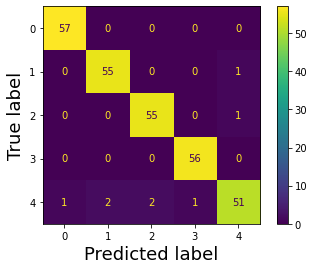

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(30,30))
#Compute confusion matrix to evaluate the accuray of a classification
confusion_table = confusion_matrix(y_test,en_pred)

#Confusion matrix visualization
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_table, display_labels=[0,1,2,3,4])

#create the plot
cm_display.plot()

#display the plot
plt.show()


 ### 0 - 'Harmful_Traditional_practice', 1 - 'Physical_violence', 2 - 'economic_violence', 3 - 'emotional_violence',  4 - 'sexual_violence'   

In [53]:
# how to save the model into the folder 
import joblib

joblib.dump(ensemble, 'GBV/Model/VotingClassifier_soft_model.pkl')

['GBV/Model/VotingClassifier_soft_model.pkl']

## 5. Histogram Gradient Boosting

In [ ]:
# # evaluate Histogram gradient boosting algorithm for classification
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn import metrics

# # # explicitly requires this experimental feature
# from sklearn.experimental import enable_hist_gradient_boosting

# # # split the data test
# from sklearn.model_selection import train_test_split
# # # target = train['type']

# # x_train,x_test,y_train,y_test=train_test_split(vector, target, test_size=0.30, random_state=100)

# xtr = x_train_ros.toarray()
# # # ytr = y_train.toarray()
# xte = X_test.toarray()
# # # yte = y_test.toarray()


# # # define the model
# hgb = HistGradientBoostingClassifier()

# # #fit the model
# hgb.fit(xtr, y_train_ros)

# # # evaluate the model
# hg_pred = hgb.predict(xte)

# # # Calculating the f1 score
# f1_score=metrics.f1_score(y_test,hg_pred,average='macro')
# f1_score

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,hg_pred))

In [ ]:
# # from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# plt.figure(figsize=(30,30))
#  #Compute confusion matrix to evaluate the accuray of a classification
# confusion_table = confusion_matrix(y_test,hg_pred)

# # #Confusion matrix visualization
# cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_table, display_labels=[0,1,2,3,4])

# #create the plot
# cm_display.plot()

# #display the plot
# plt.show()


 ### 0 - 'Harmful_Traditional_practice', 1 - 'Physical_violence', 2 - 'economic_violence', 3 - 'emotional_violence',  4 - 'sexual_violence'   

In [ ]:
#!pip install joblib

In [ ]:
# # how to save the model into the folder 
# import joblib

# joblib.dump(ensemble, 'GBV/Model/hgb.pkl')